In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
import matplotlib.pyplot as plt

def initialize_circuit_with_inputs(input_bits):

    if len(input_bits) != 2:
        raise ValueError("Exactly 2 input bits are required")
        
    qc = QuantumCircuit(2, 1)
    
    # Initialize qubits based on input
    for i, bit in enumerate(input_bits):
        if bit == 1:
            qc.x(i)
            
    return qc

def apply_gate(qc, gate_type):

    if gate_type == "OR":
        qc.cx(0, 1)
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)
        
    elif gate_type == "AND":
        qc.cx(0, 1)
        qc.h(1)
        qc.cx(0, 1)
        qc.h(1)
        
    elif gate_type == "NAND":
        qc.cx(0, 1)
        qc.h(1)
        qc.cx(0, 1)
        qc.h(1)
        qc.x(1)
        
    elif gate_type == "NOR":
        qc.cx(0, 1)
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)
        qc.x(1)
        
    elif gate_type == "XOR":
        qc.cx(0, 1)
    
    return qc

def visualize_gate(qc, gate_type, input_bits):
    
    # Clone circuit and add measurement
    qc_measured = qc.copy()
    qc_measured.measure(1, 0)
    
    # Get statevector
    state = Statevector.from_instruction(qc)
    
    # Create circuit diagram
    fig1 = plt.figure(figsize=(15, 4))
    ax1 = fig1.add_subplot(111)
    qc_measured.draw('mpl', ax=ax1)
    ax1.set_title(f'{gate_type} Gate Circuit (Inputs: {input_bits[0]}, {input_bits[1]})', 
                 fontsize=16, pad=20)
    plt.tight_layout()
    
    # Create QSphere visualization
    fig2 = plt.figure(figsize=(10, 10))
    ax2 = fig2.add_subplot(111)
    plot_state_qsphere(state, ax=ax2)
    ax2.set_title(f'{gate_type} Gate QSphere (Inputs: {input_bits[0]}, {input_bits[1]})', 
                 fontsize=16, pad=20)
    plt.tight_layout()
    
    return fig1, fig2

def create_and_visualize_gate(gate_type, input_bits):
   
    try:
        # Initialize circuit with inputs
        qc = initialize_circuit_with_inputs(input_bits)
        
        # Apply the specified gate
        qc = apply_gate(qc, gate_type)
        
        # Create visualizations
        fig1, fig2 = visualize_gate(qc, gate_type, input_bits)
        
        plt.show()
        plt.close('all')
        
    except Exception as e:
        print(f"Error with {gate_type} gate: {str(e)}")

# Example usage
def test_all_combinations():
    
    gates = ["OR", "AND", "NAND", "NOR", "XOR"]
    input_combinations = [[0, 0], [0, 1], [1, 0], [1, 1]]
    
    for gate in gates:
        print(f"\nTesting {gate} gate with all input combinations:")
        for inputs in input_combinations:
            print(f"\nInputs: {inputs}")
            create_and_visualize_gate(gate, inputs)

# Example for specific gate and inputs
def test_specific_gate(gate_type, input_bits):
   
    print(f"\nTesting {gate_type} gate with inputs {input_bits}")
    create_and_visualize_gate(gate_type, input_bits)




Testing OR gate with all input combinations:

Inputs: [0, 0]


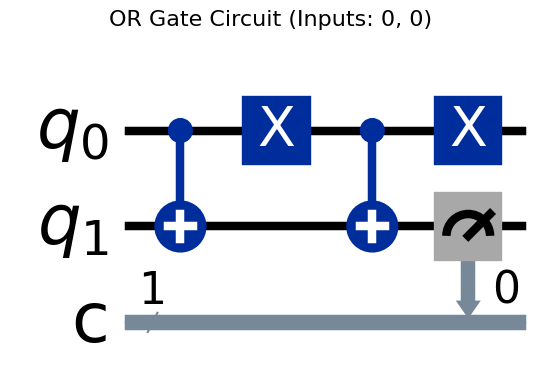

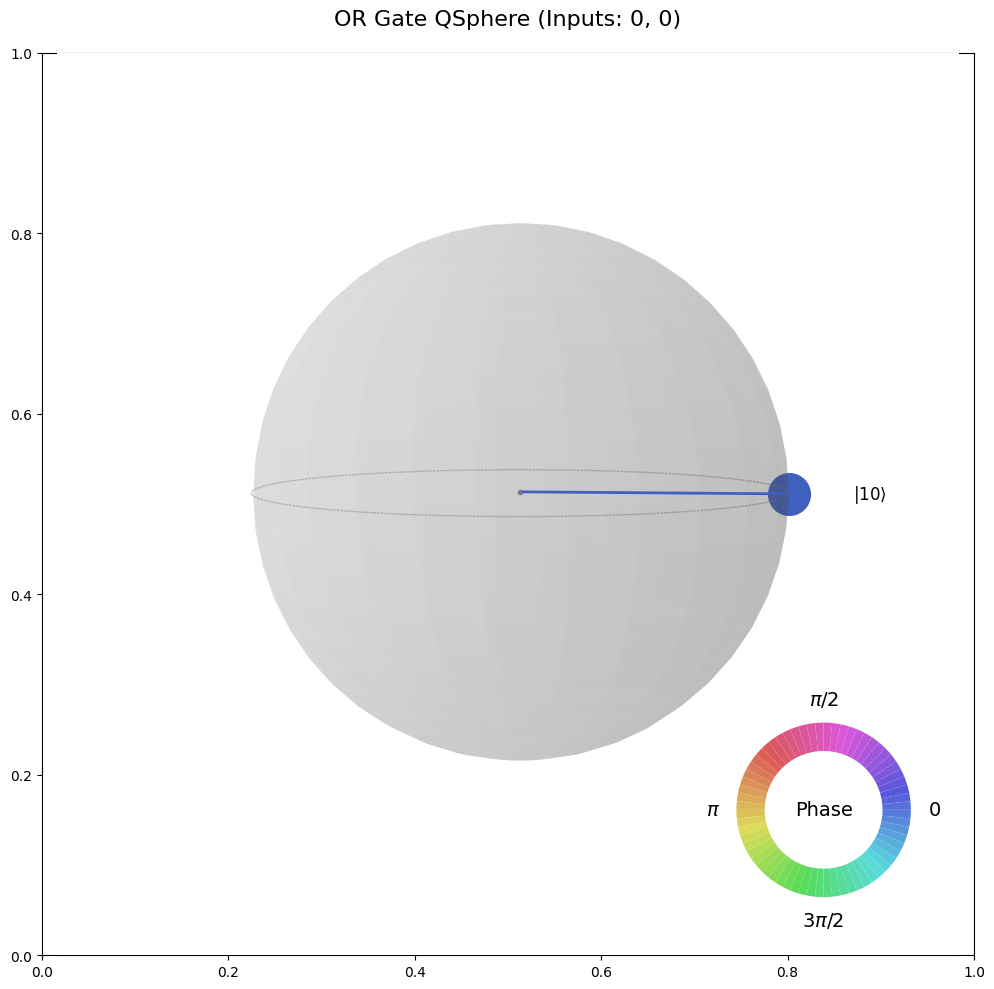


Inputs: [0, 1]


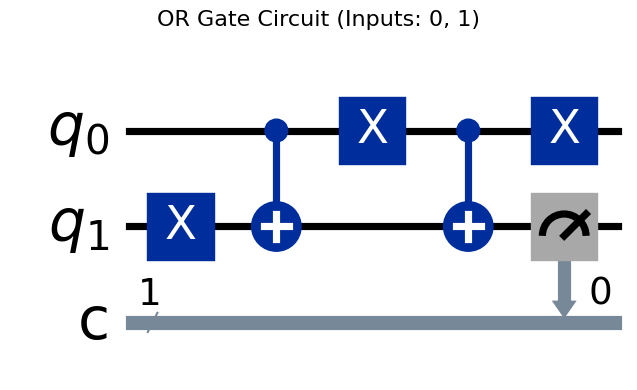

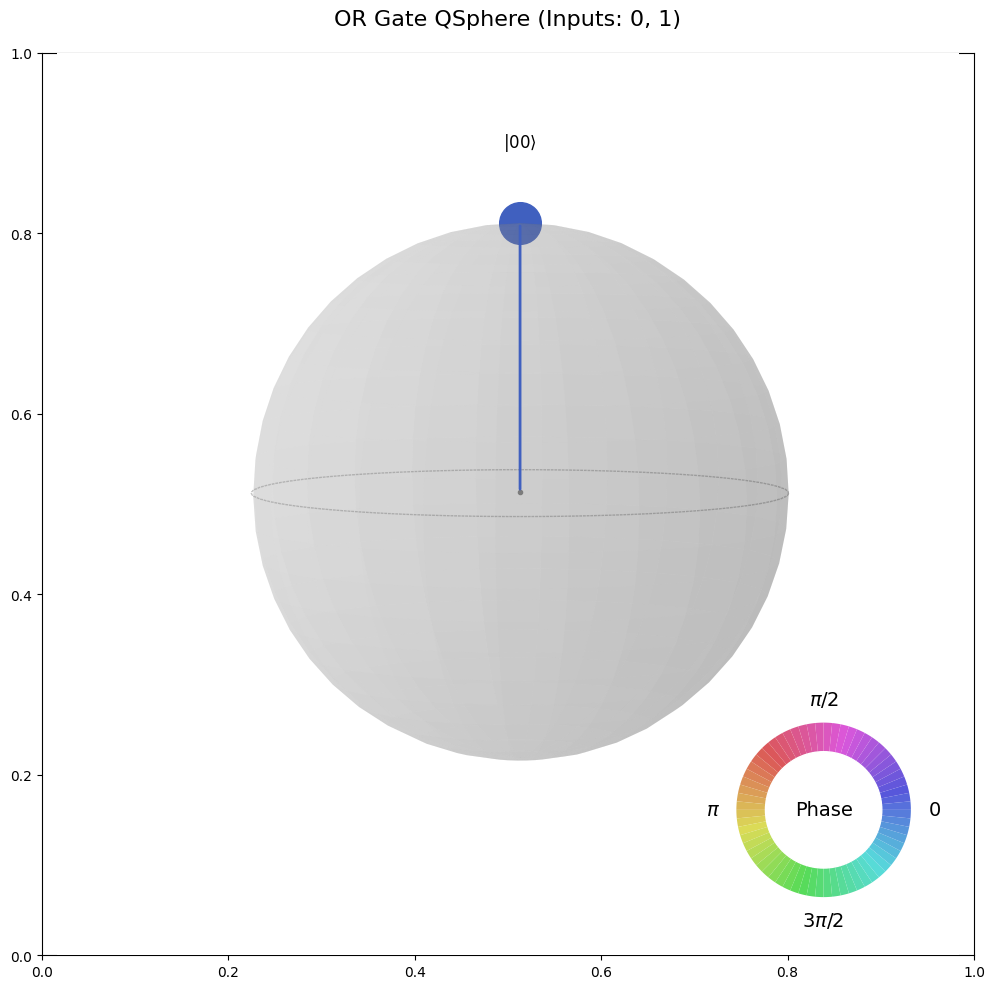


Inputs: [1, 0]


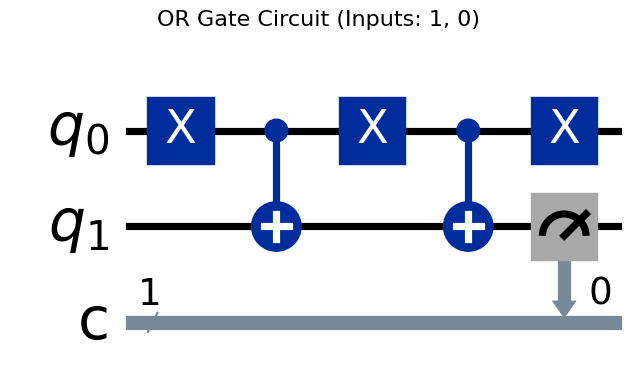

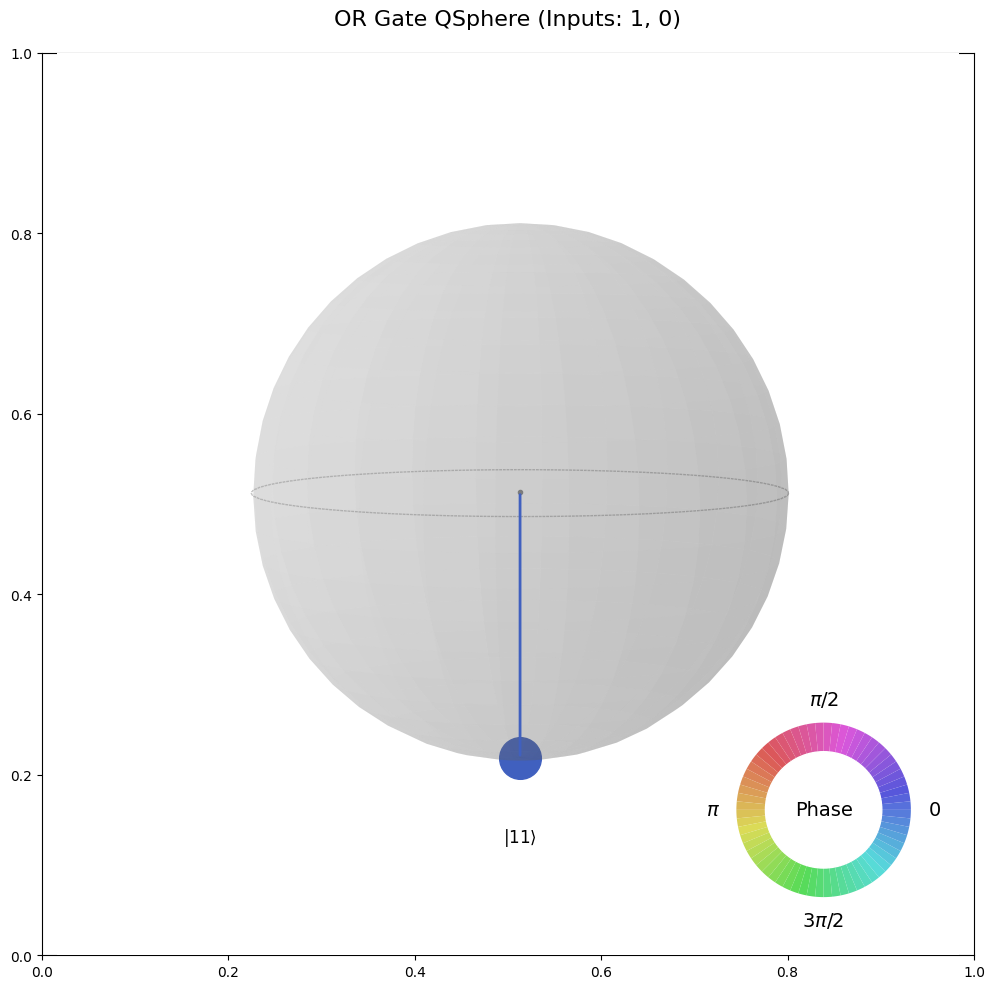


Inputs: [1, 1]


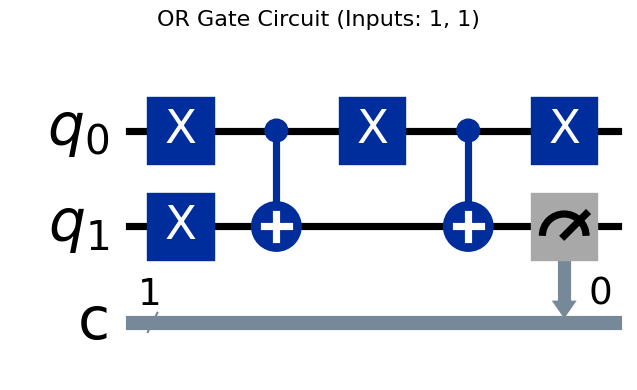

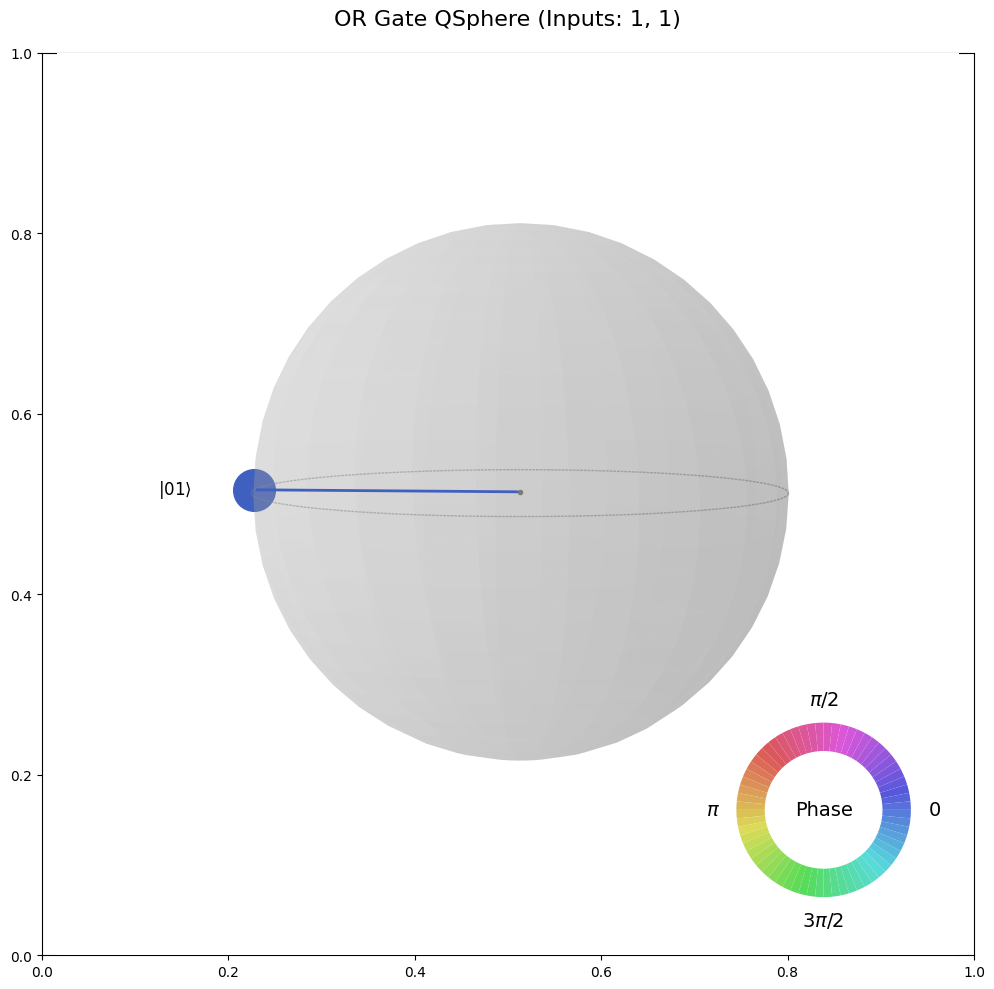


Testing AND gate with all input combinations:

Inputs: [0, 0]


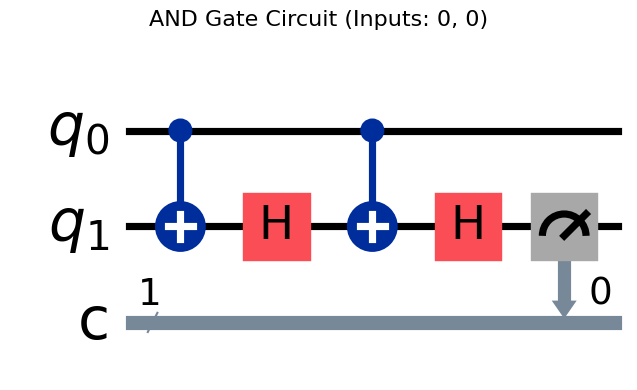

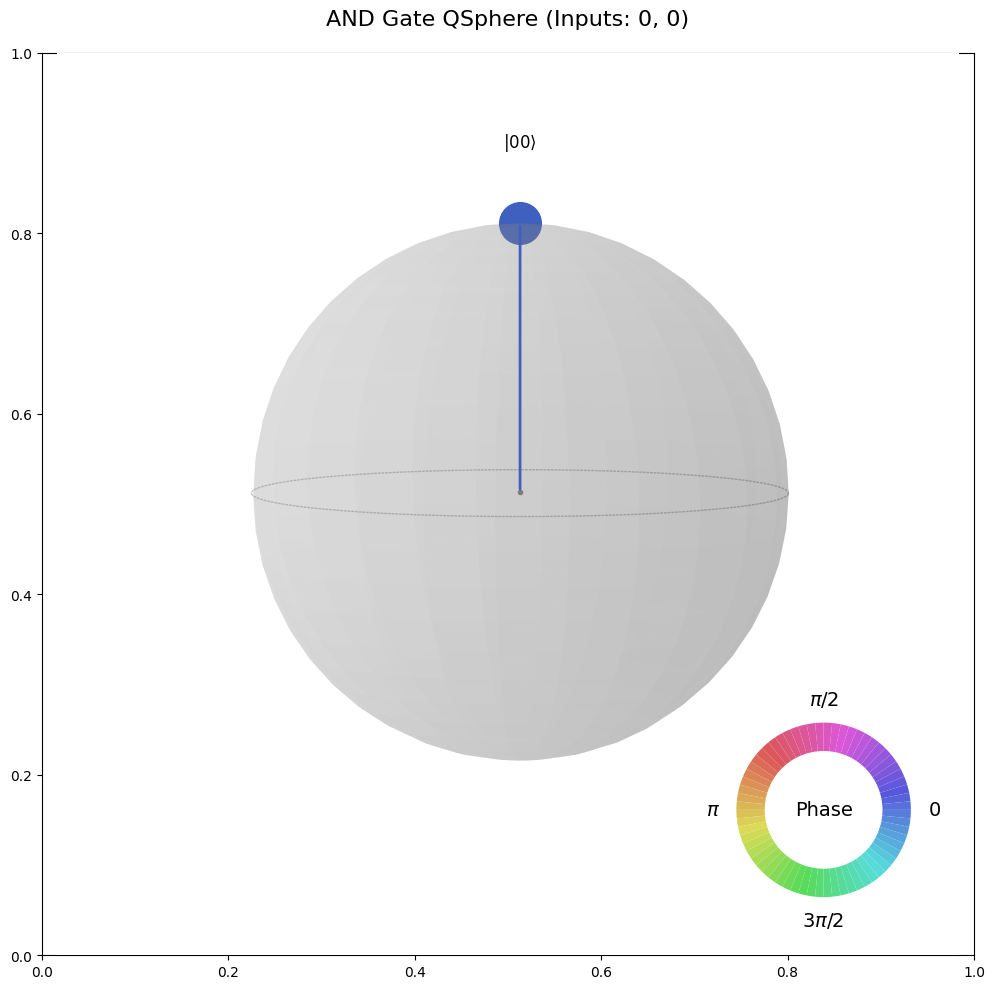


Inputs: [0, 1]


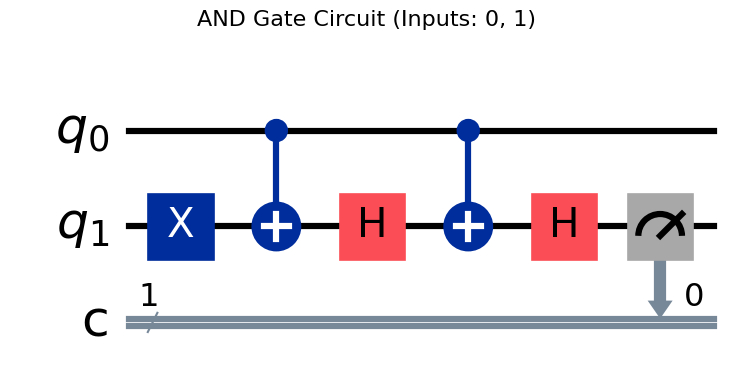

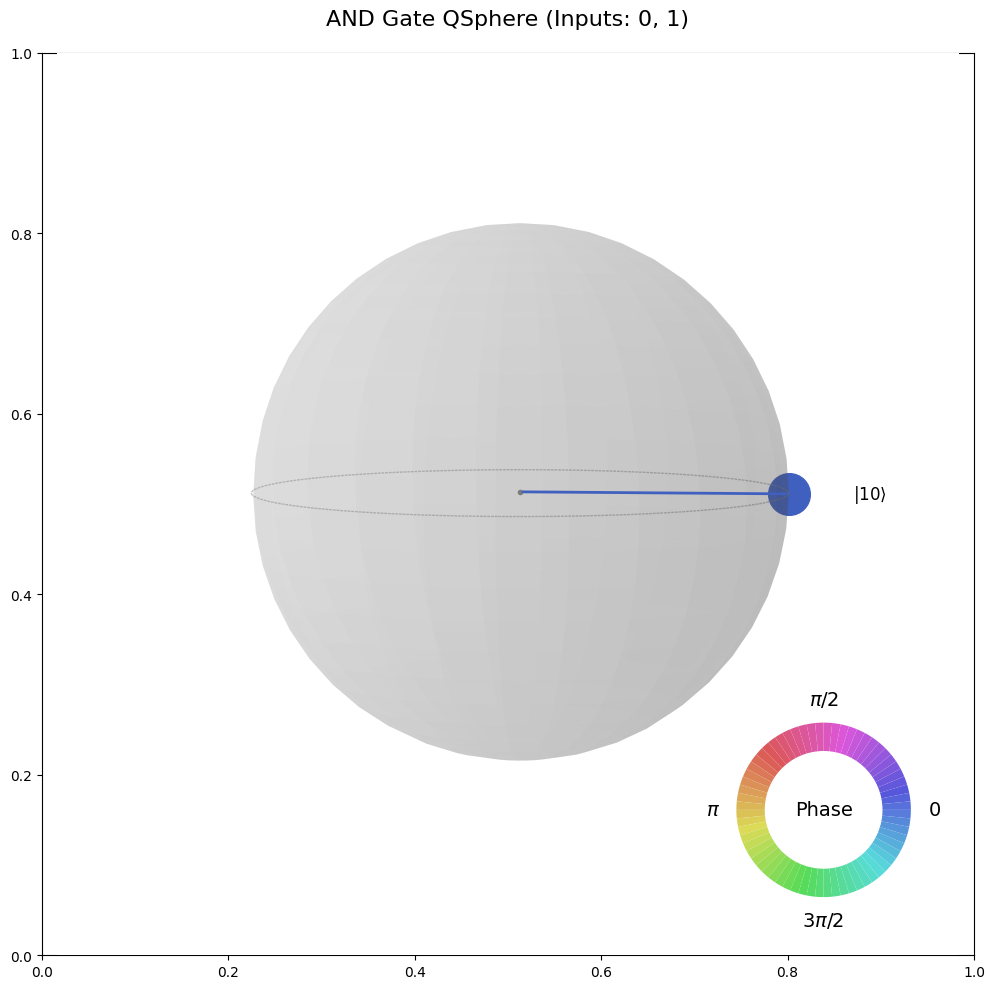


Inputs: [1, 0]


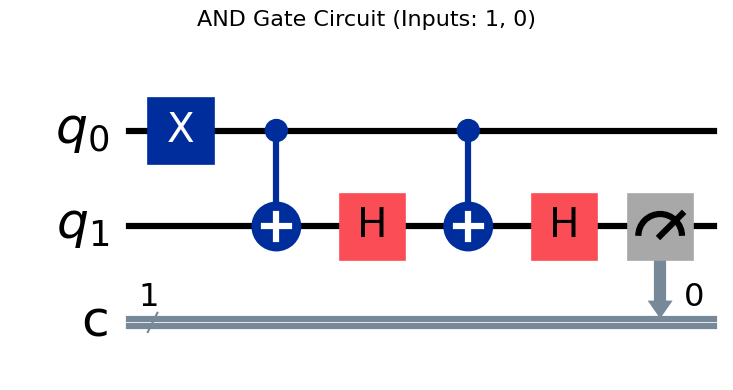

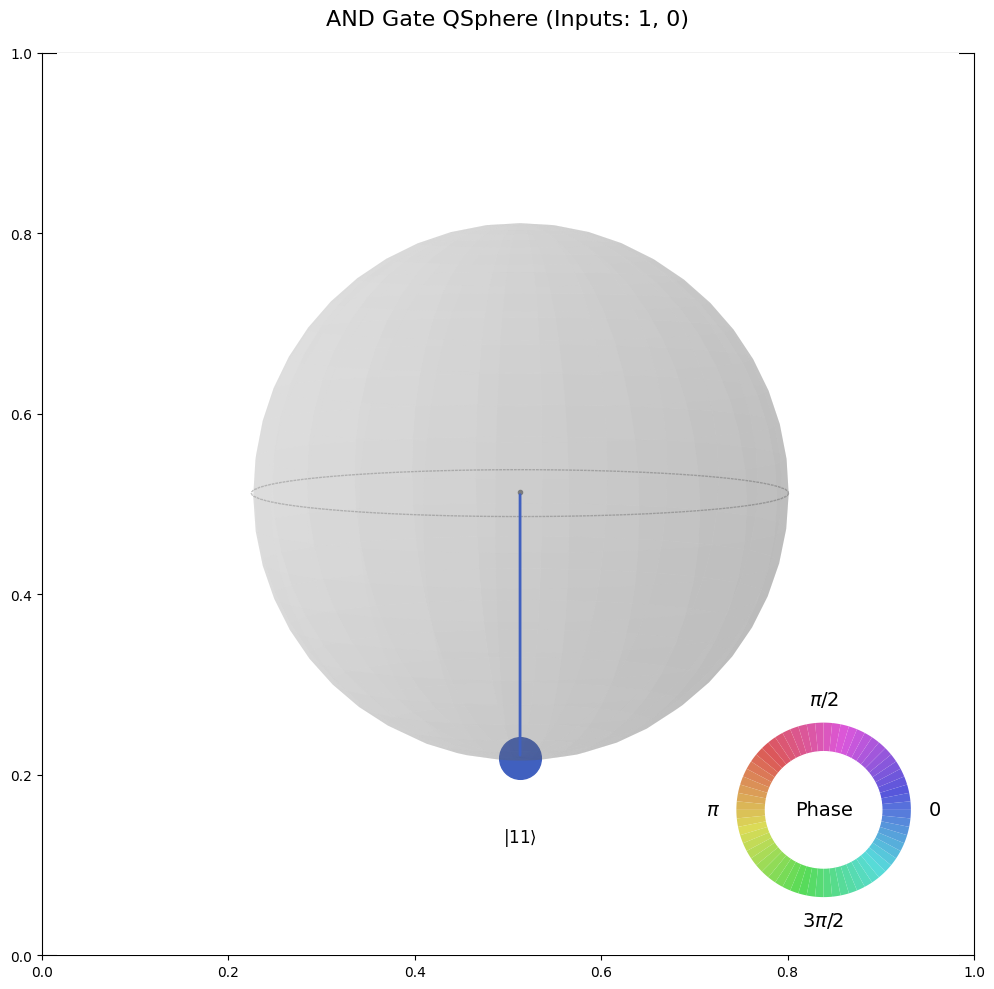


Inputs: [1, 1]


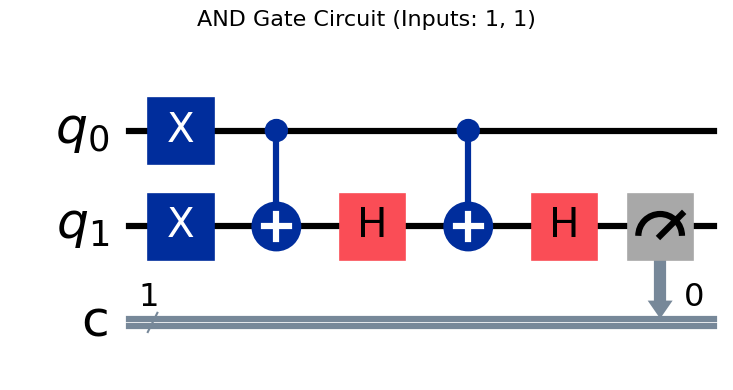

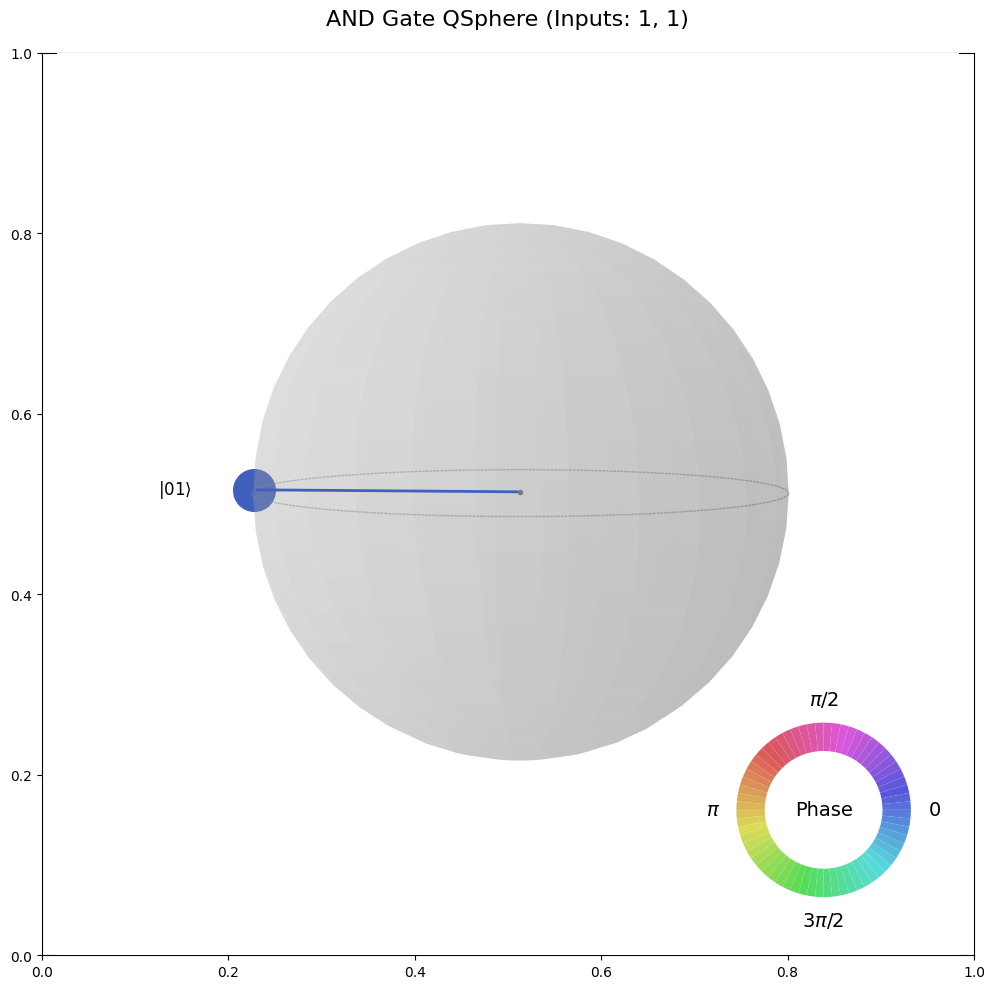


Testing NAND gate with all input combinations:

Inputs: [0, 0]


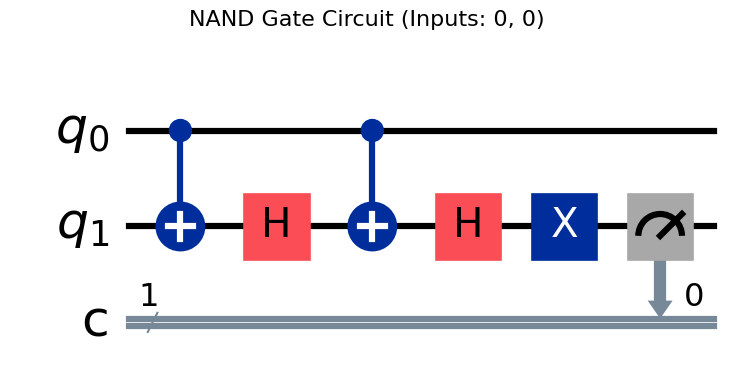

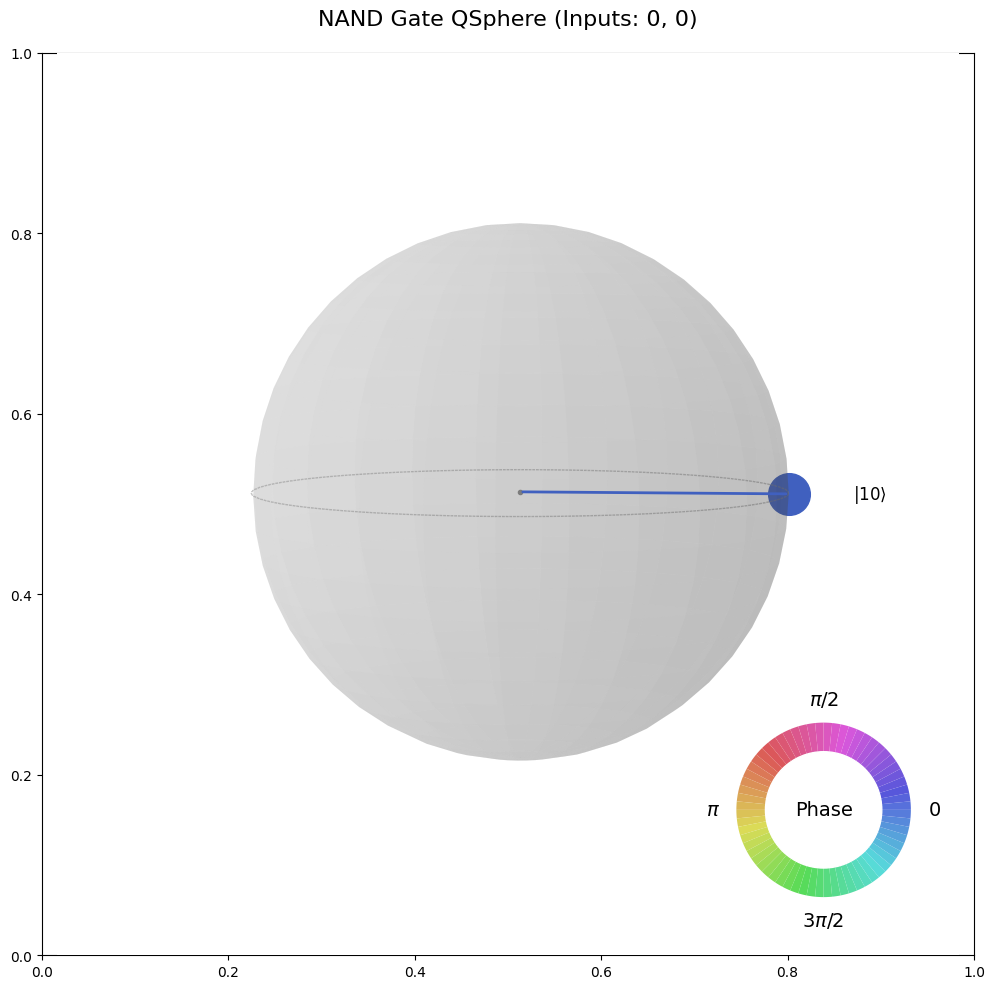


Inputs: [0, 1]


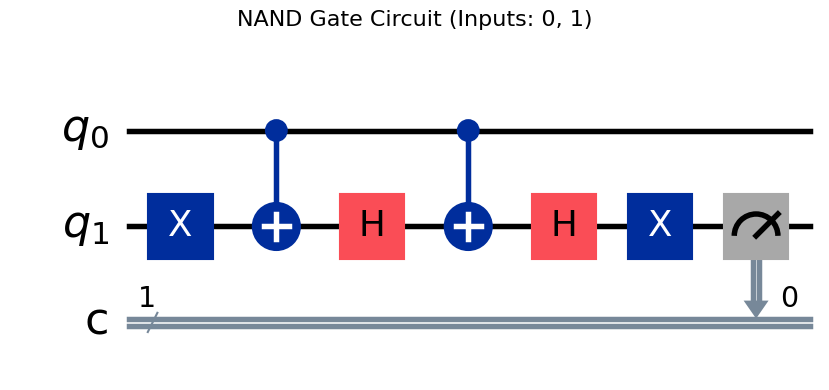

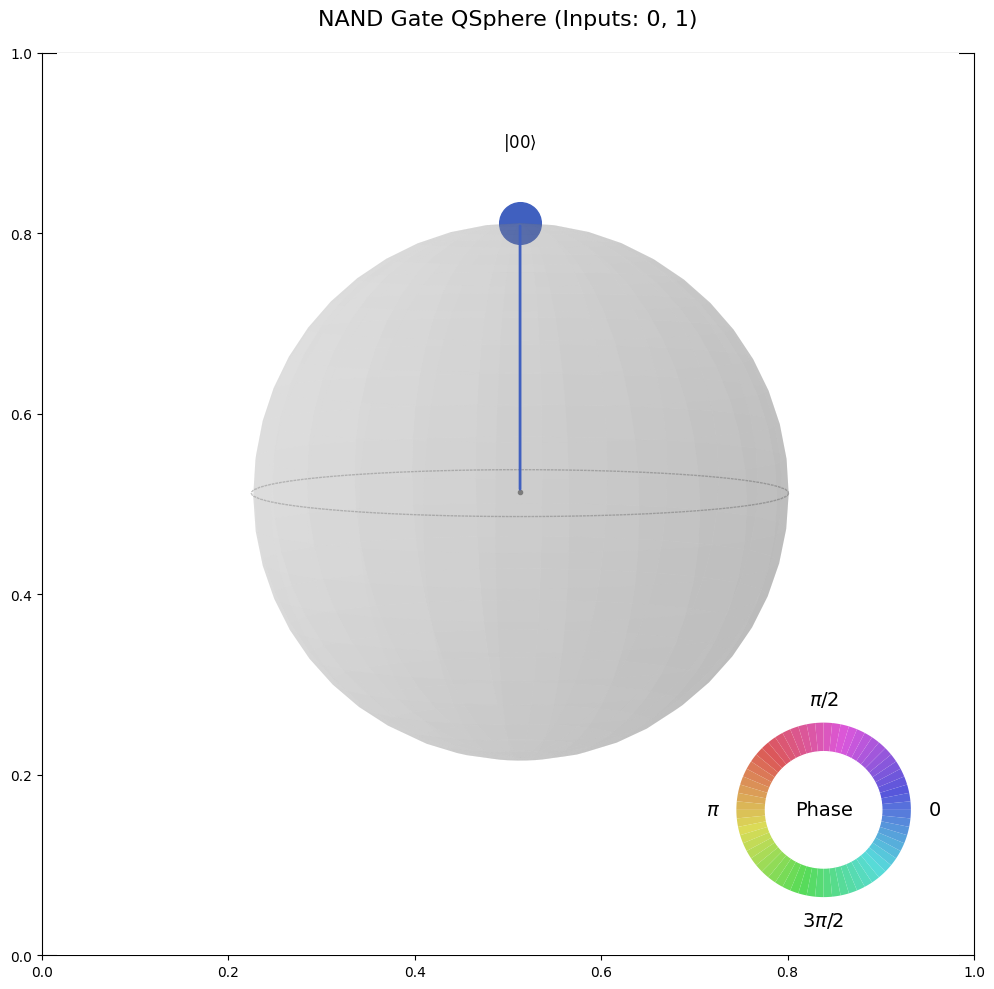


Inputs: [1, 0]


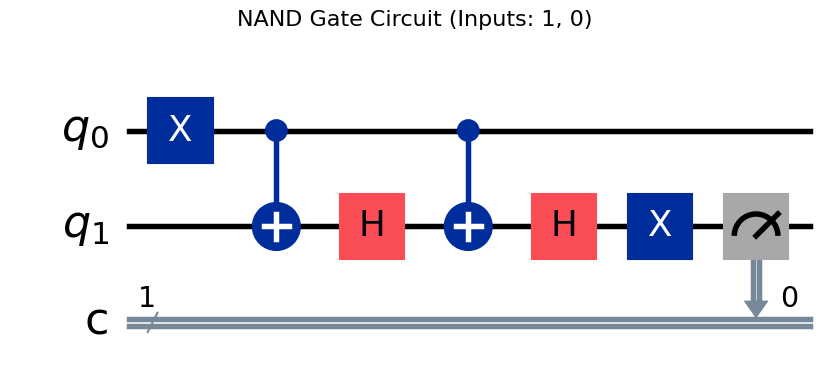

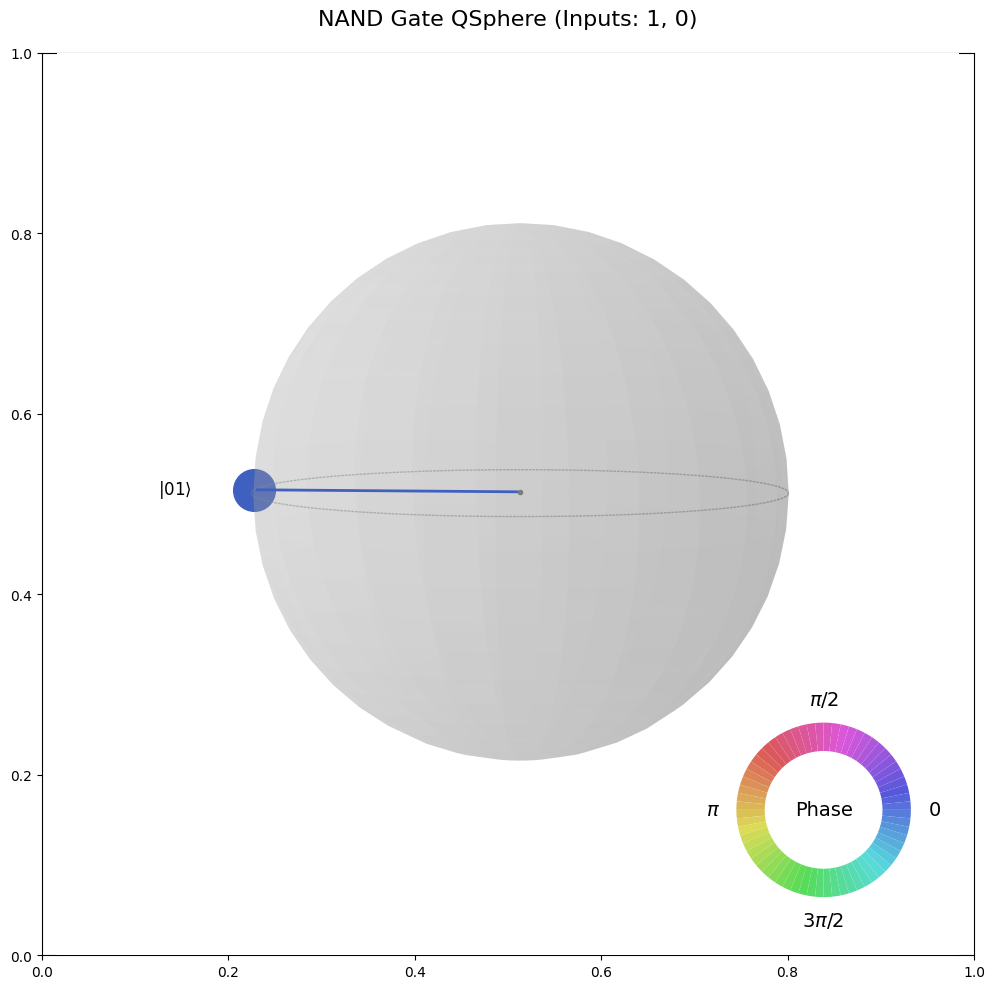


Inputs: [1, 1]


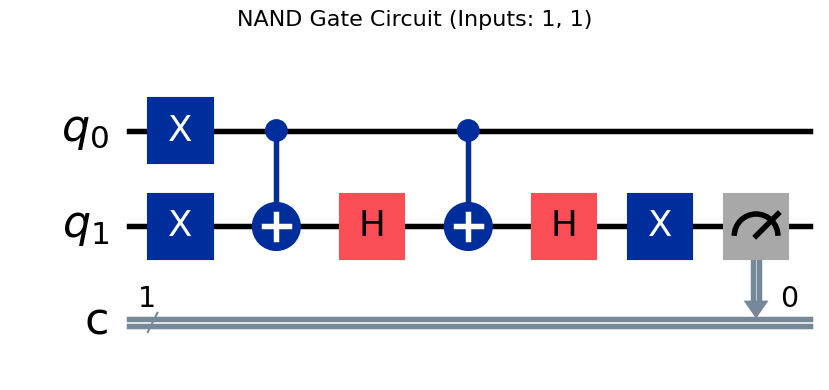

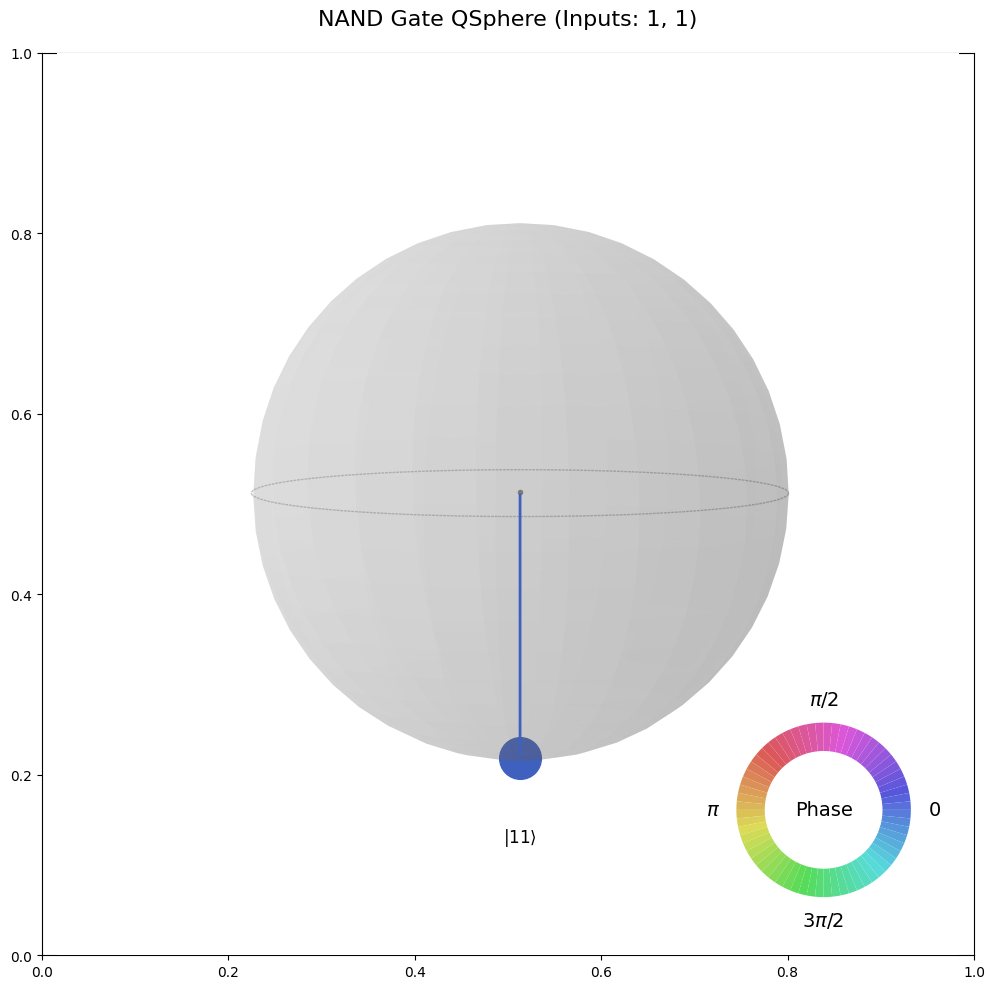


Testing NOR gate with all input combinations:

Inputs: [0, 0]


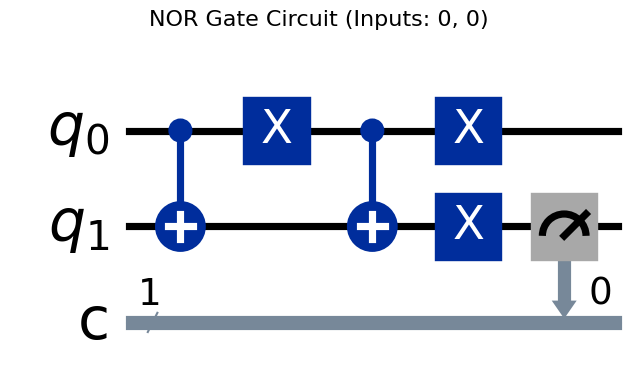

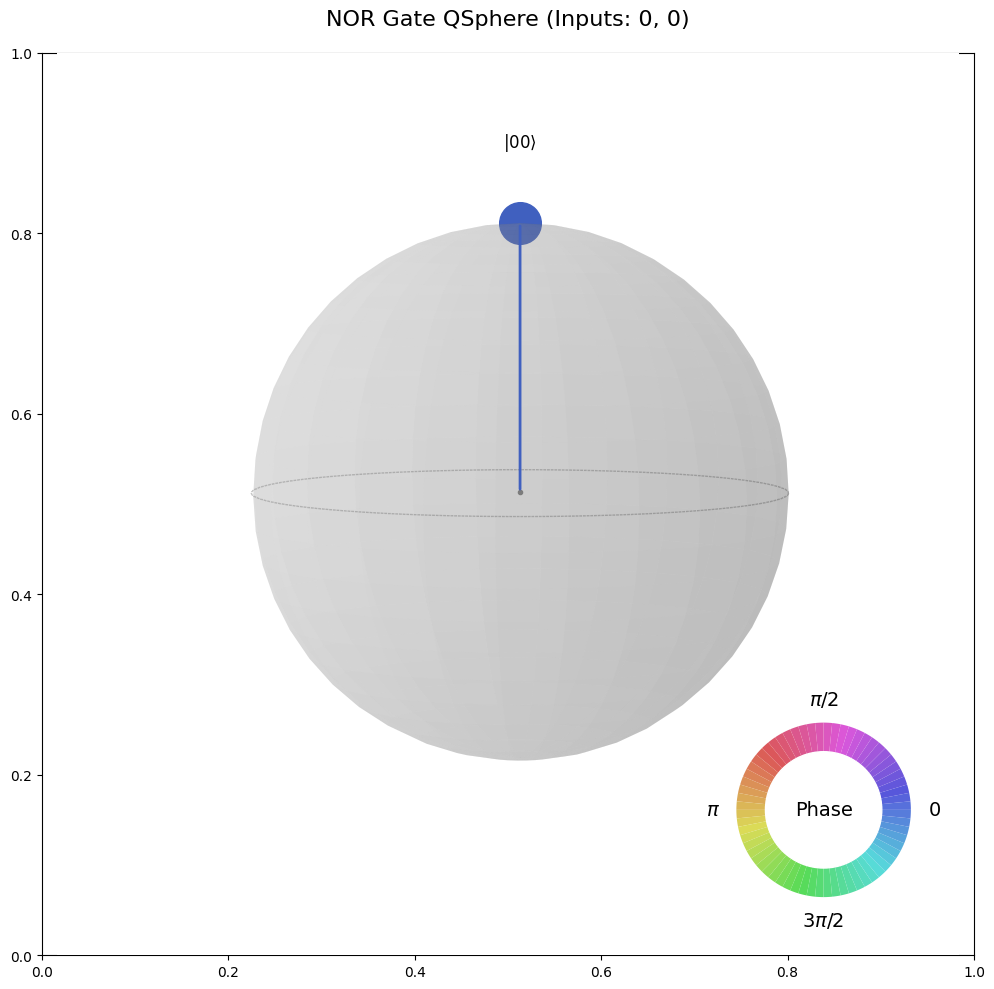


Inputs: [0, 1]


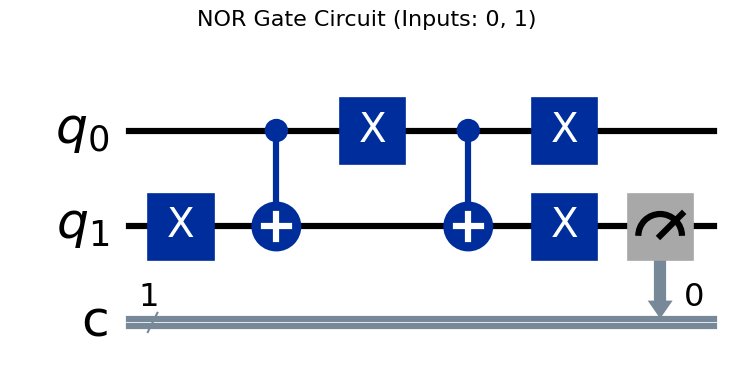

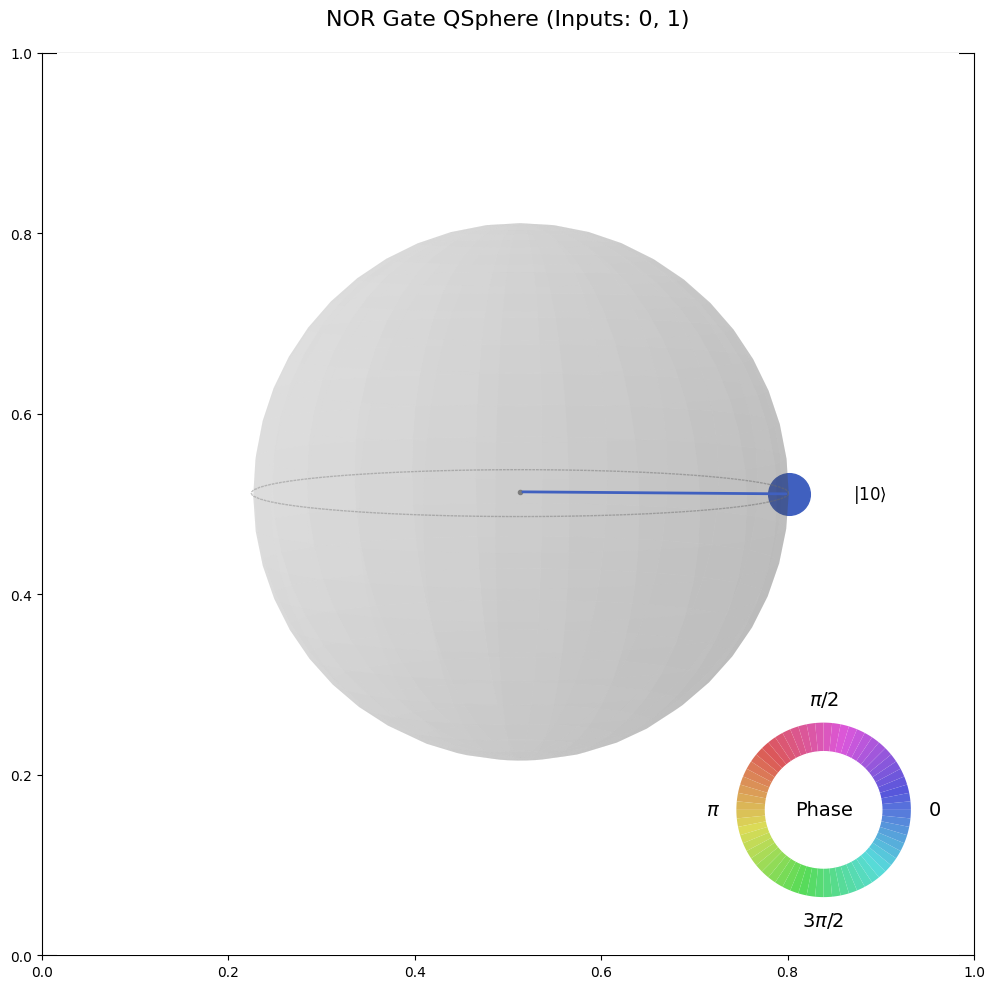


Inputs: [1, 0]


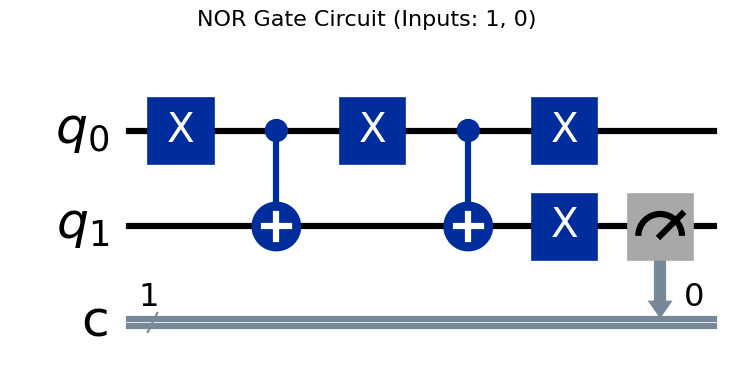

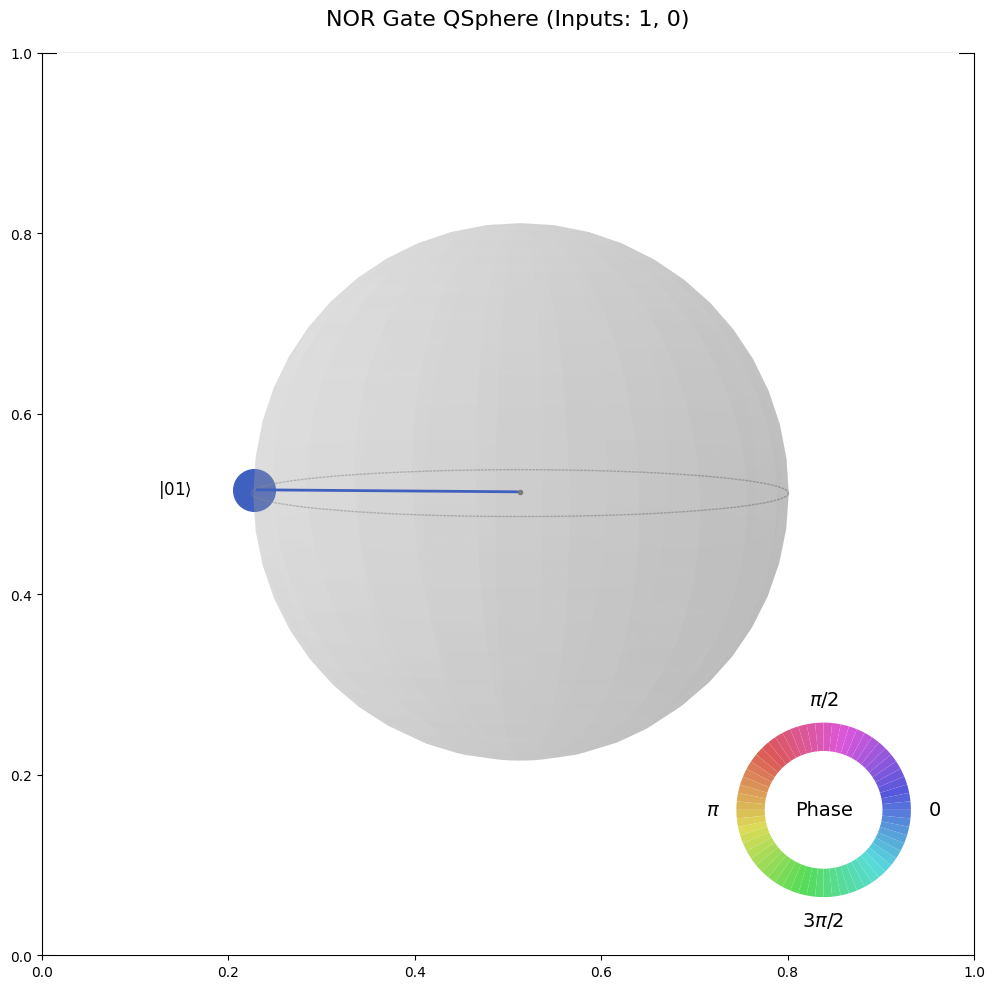


Inputs: [1, 1]


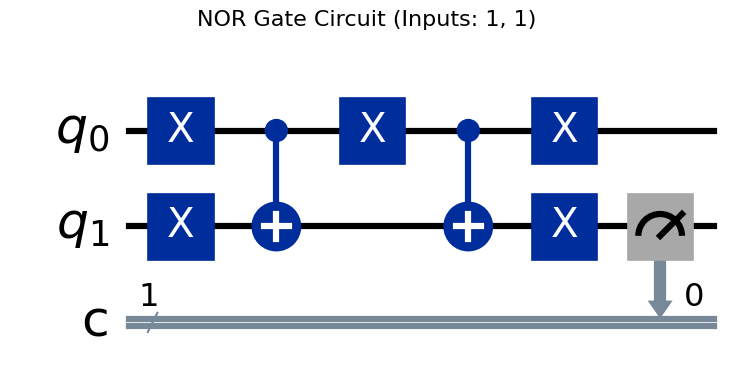

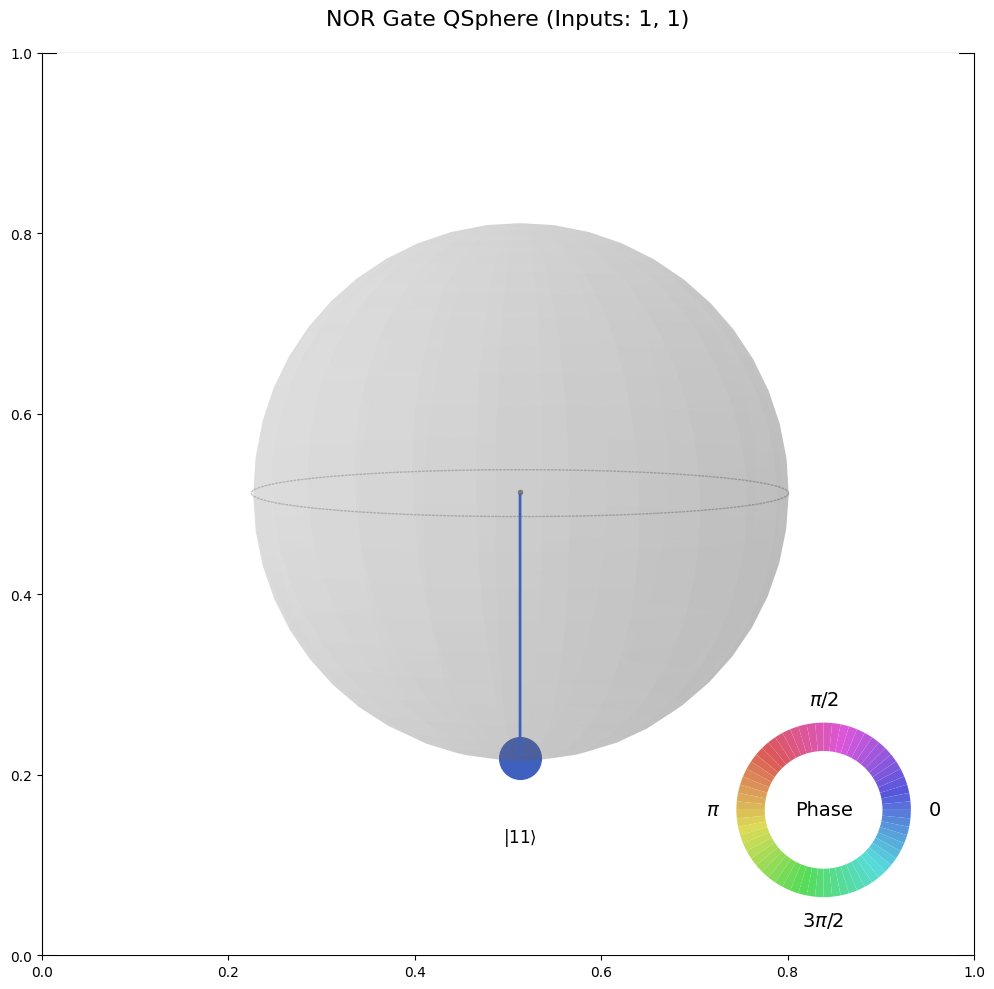


Testing XOR gate with all input combinations:

Inputs: [0, 0]


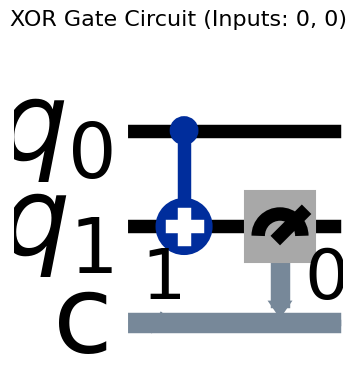

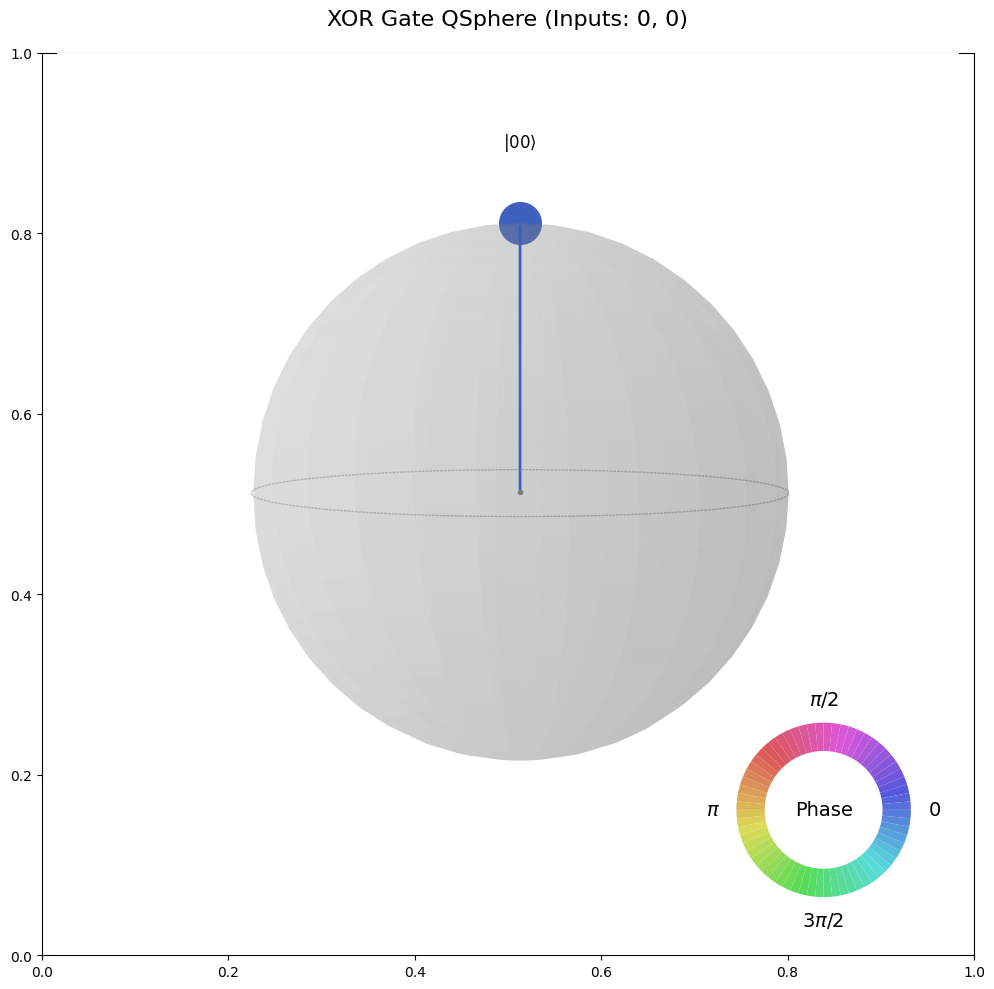


Inputs: [0, 1]


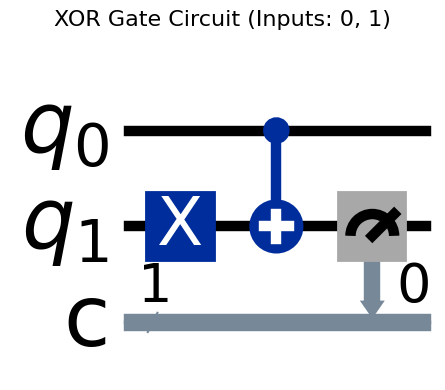

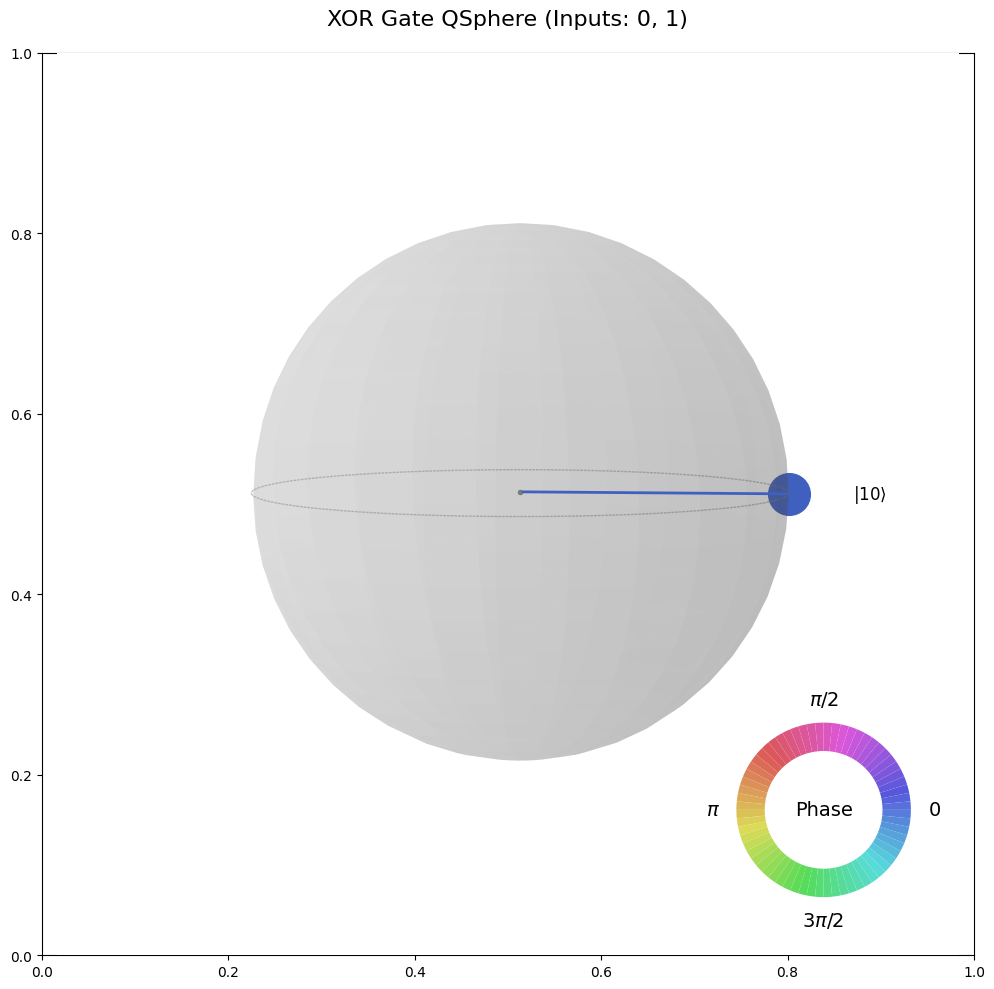


Inputs: [1, 0]


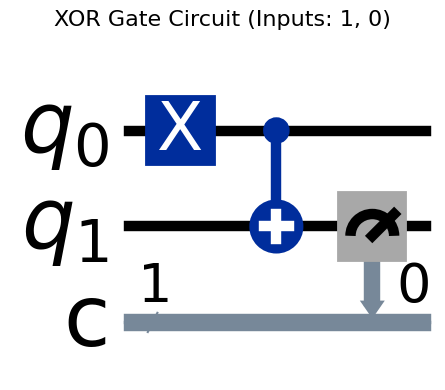

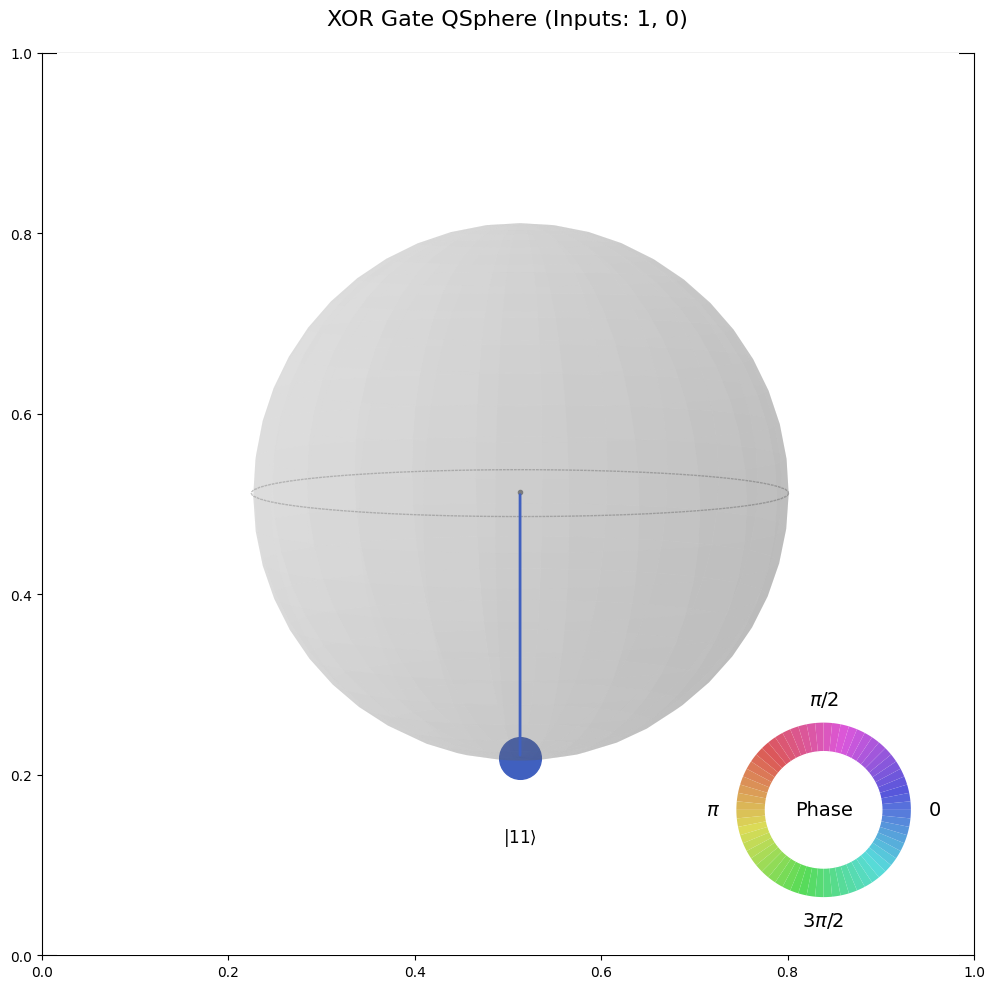


Inputs: [1, 1]


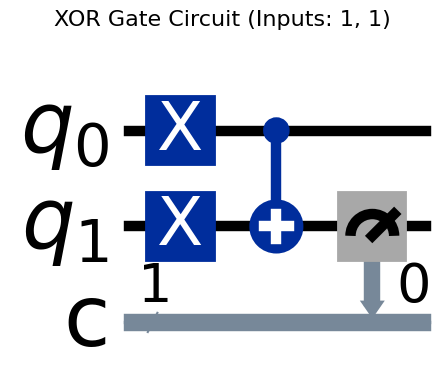

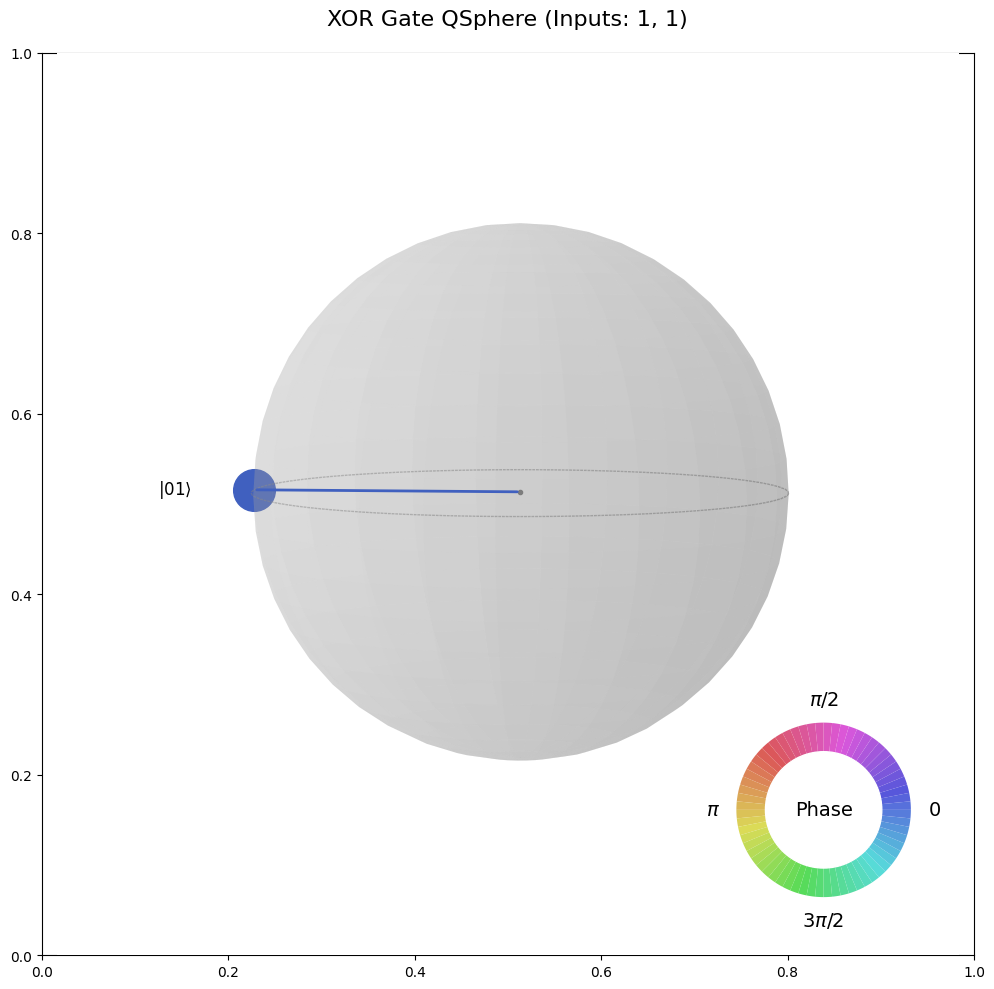

In [2]:
# Test all possible combinations for all gates
test_all_combinations()

# # Test multiple specific cases
# test_specific_gate("AND", [1, 1])
# test_specific_gate("OR", [0, 1])